In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/content/disney.csv")

Ces lignes sont utilisées pour l'importation de bibliothèques Python et le chargement d'un fichier CSV nommé **disney.csv**.


---


**1-** Importation de la bibliothèque Pandas pour travailler avec des tableaux de données ou des feuilles de calcul.

**2-** Importation de la bibliothèque Seaborn (une bibliothèque de visualisation de données basée sur Matplotlib) pour créer des graphiques plus esthétiques et plus informatifs que Matplotlib.

**3-** Importation de la bibliothèque Matplotlib.pyplot pour la création de graphiques.

**4-** Importe la bibliothèque NumPy pour travailler avec des tableaux et des matrices multidimensionnels.

**5-** Chargement dess données Disney au format CSV..

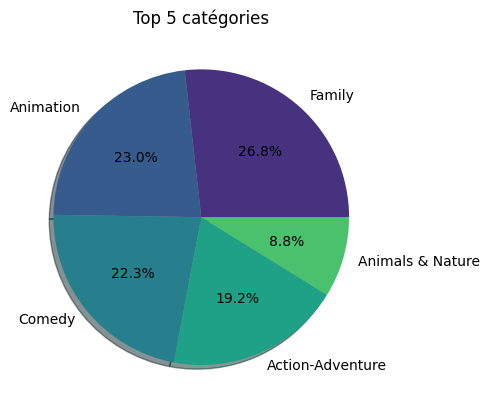

In [ ]:
topf_categorie = df['listed_in'].str.split(', ').explode().value_counts().nlargest(5)
longr = topf_categorie.values.tolist()
c_palette = sns.color_palette("viridis")
colors = c_palette[:len(longr)]

plt.pie(longr, labels=topf_categorie.index.tolist(),  colors=colors, autopct='%1.1f%%', shadow=True, textprops={'color': "black"})
plt.title("Top 5 catégories")

plt.show()

**Top 5 des meilleures catégories :**

Création d'un diagramme circulaire des 5 catégories les plus fréquentes.

- *split* : séparation de la colonne catégorie nommée "listed_in" par des virgules.
- *explode* : création d'une ligne pour chaque catégorie.
- *value_counts* : compte du nombre d'occurrences.
- *nlargest(5)* : conservation des 5 catégories les plus fréquentes.
- *tolist* : compte du nombre d'éléments de la liste.
- *palette* : création d'une palette de couleurs prédéfinie.
- *pie* : création d'un diagramme circulaire en utilisant les nombres d'éléments de la liste pour les tailles de chaque tranche, les noms de catégorie de "topf_categorie" pour les étiquettes de chaque tranche. L"autopct" est utilisée pour afficher la proportion de chaque tranche sous forme de pourcentage.


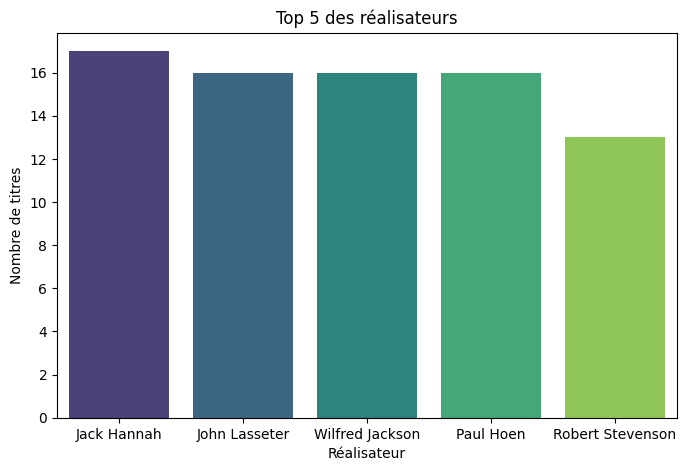

In [ ]:
compt_directeur = df['director'].str.split(', ').explode().value_counts()
topf_directeur = compt_directeur.nlargest(5)

plt.figure(figsize=(8, 5))
sns.barplot(x=topf_directeur.index, y=topf_directeur.values, palette="viridis")
plt.title("Top 5 des réalisateurs")
plt.xlabel("Réalisateur")
plt.ylabel("Nombre de titres")

plt.show()

**Top 5 des réalisateurs :**

Création d'un diagramme à barre des 5 réalisateurs les plus fréquents.

Pour les 2 premières lignes, on utilise une méthode similaire à celle utilisée pour créer le diagramme circulaire dans la réponse précédente.

- *figsize* : définition de la taille de la figure.
- *barplot* :  création d'un diagramme à barres. L'axe x est défini par les noms de réalisateurs les plus fréquents, l'axe y est défini par les nombres d'occurrences de chaque réalisateur.
- *palette* : utilisation de la palette prédéfinie virdis.

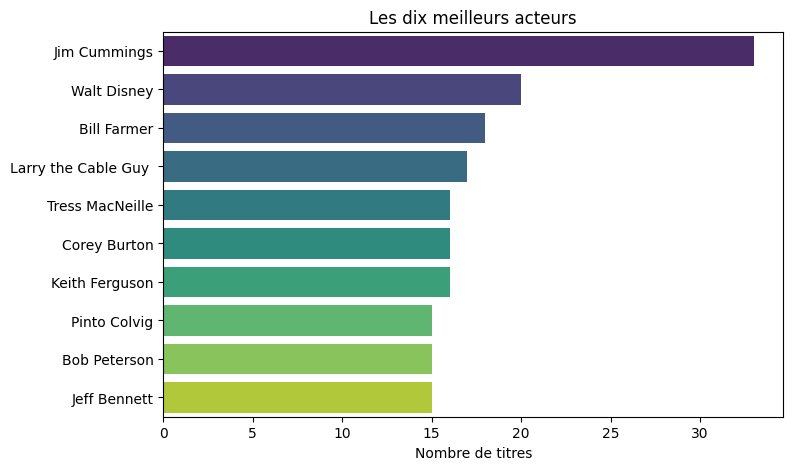

In [ ]:
top_acteur = df['cast'].str.split(', ').explode().value_counts().nlargest(10)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_acteur.values, y=top_acteur.index, palette="viridis")
plt.title("Les dix meilleurs acteurs")
plt.xlabel("Nombre de titres")

plt.show()

**Les dix meilleurs acteurs :**

Création d'un diagramme à barre des 10 meilleurs acteurs.

Pour ce diagramme, on utilise une méthode similaire à celle utilisée pour créer le diagramme à barres dans la réponse précédente : 
- *figsize* : définition de la taille de la figure.
- *barplot* : création d'un diagramme à barres. L'axe x est défini par les noms des acteurs, l'axe y est défini par les nombres de titres de chaque acteur.
- *palette* : utilisation de la palette prédéfinie virdis.

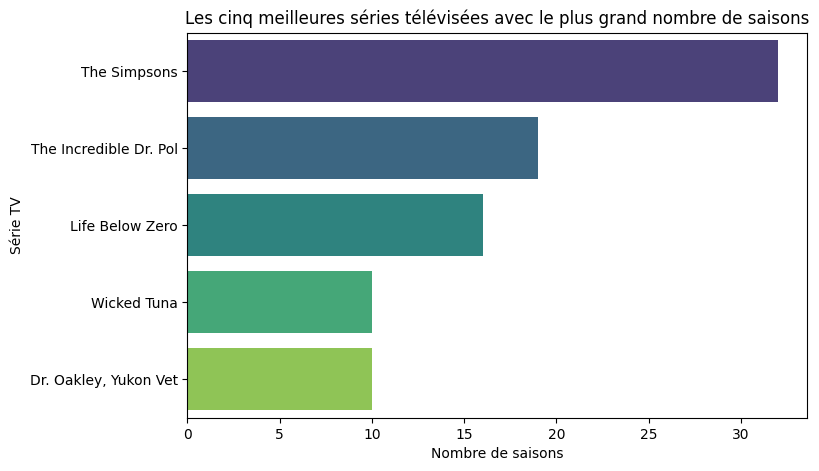

In [ ]:
Grand_Nbr_Saison = df[df["duration"].str.contains("Season|Seasons")].copy()
Grand_Nbr_Saison["duration"] = Grand_Nbr_Saison["duration"].str.replace("Seasons?", "", regex=True).astype(int)
Meilleures_Series = Grand_Nbr_Saison.sort_values("duration", ascending=False).head(5)

plt.figure(figsize=(8,5))
sns.barplot(x="duration", y="title", data=Meilleures_Series, palette="viridis")
plt.xlabel("Nombre de saisons")
plt.ylabel("Série TV")
plt.title("Les cinq meilleures séries télévisées avec le plus grand nombre de saisons")

plt.show()

**Les cinq meilleures séries télévisées avec le plus grand nombre de saisons :**

Création d'un diagramme à barre des cinq meilleures séries télévisées avec le plus grand nombre de saisons.

- *copy* : création d'une copie de sous-ensemble de données dans une nouvelle variable.
- *replace* : supression du mot "Season" ou "Seasons" de la colonne "duration" pour ne garder que le nombre de saisons.
- *astype* : conversion du nombre de saisons en entier.
- *sort_values* : triage des séries en fonction de leur nombre de saisons, en ordre décroissant.

> Indented block



Pour les 6 dernières lignes, on utilise une méthode similaire à celle utilisée pour créer le diagramme à barres dans la réponse précédente.

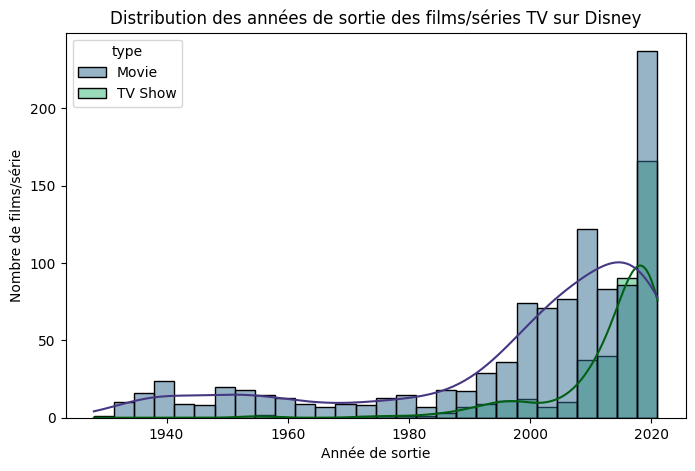

In [ ]:
plt.figure(figsize=(8, 5))
hist = sns.histplot(df, x="release_year", hue="type", kde=True, palette="viridis")

hist.get_lines()[0].set_color("#026014")
hist.get_lines()[1].set_color("#453781FF")

hist.set_xlabel("Année de sortie")
hist.set_ylabel("Nombre de films/série")

hist.set_title("Distribution des années de sortie des films/séries TV sur Disney")

plt.show()

**Distribution des années de sortie des films/séries TV sur Disney :**

Création d'un histogramme pour une distribution des années de sortie des films/séries TV sur Disney.

- *histplot* : création d'un histogramme des années de sortie des films et séries, "kde" est utilisée pour activer la courbe de densité de probabilité. La "palette" pour définir la couleur des deux courbes.
- *get_lines* : accès aux différentes lignes de l'histogramme afin de modifier les couleurs.

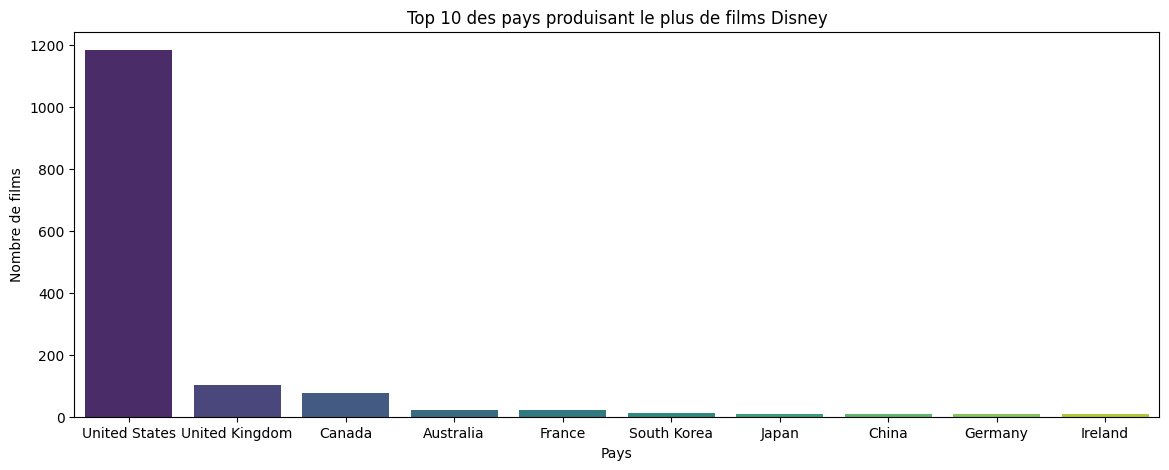

In [ ]:
List_Pays = {}
for country in df['country']:
    if isinstance(country, str):
        for compteur in country.split(','):
            compteur = compteur.strip()
            List_Pays[compteur] = List_Pays.get(compteur, 0) + 1
Top_Pays = dict(sorted(List_Pays.items(), key=lambda x: x[1], reverse=True)[:10])  

plt.figure(figsize=(14, 5))
sns.barplot(x=list(Top_Pays.keys()), y=list(Top_Pays.values()),  palette="viridis")
plt.xlabel('Pays')
plt.ylabel('Nombre de films')
plt.title('Top 10 des pays produisant le plus de films Disney')

plt.show()

**Top 10 des pays produisant le plus de films Disney :**

Création d'un diagramme à barres pour le top 10 des pays produisant le plus de films Disney.

- *for* : parcours de chaque ligne de la colonne "country".
- *isinstance* : vérification du type de la valeur.
- *split* : séparation par des virgules.
- *strip* :  enlèvement des espaces en début et fin de chaque pays pour éviter les erreurs de comptage.
- *List_Pays[compteur] = List_Pays.get(compteur, 0) + 1* :  utilisation d'un dictionnaire pour compter le nombre de contenus disponibles dans chaque pays. Pour chaque pays, "get" renvoie la valeur associée à la clé "compteur" dans le dictionnaire. Si cette clé n'existe pas, elle crée une clé du meme nom avec une valeur initiale de 0. On ajoute ensuite 1 à cette valeur pour compter un nouveau contenu dans ce pays.
- *dict* : création d'un nouveau dictionnaire qui contient les dix pays les plus représentés, triés en ordre décroissant selon le nombre de contenus comptés précédement. Pour chaque pays, "items" renvoie un tuple contenant la clé (le nom du pays) et la valeur (le nombre de contenus).

Pour les lignes restantes, on utilise une méthode similaire à celle utilisée pour créer le diagramme à barres.

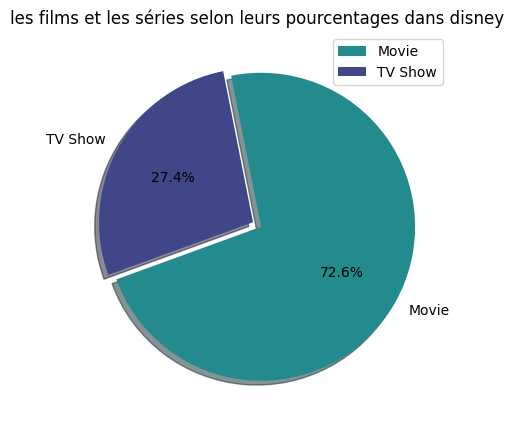

In [ ]:
plt.figure(figsize=(8, 5))
plt.title("les films et les séries selon leurs pourcentages dans disney")

graph = plt.pie(df.type.value_counts(),
                labels=df.type.value_counts().index,
                colors=['#238A8DFF', '#404788FF'],
                autopct='%1.1f%%',
                explode=(0.030, 0.030),
                startangle=200, 
                shadow=True,
                )
plt.legend(graph[0], df.type.value_counts().index)

plt.show()

**Les films et les séries selon leurs pourcentages dans disney** :        

Création d'un diagramme circulaire pour les films et les séries selon leurs pourcentages dans disney.

- *pie* : création du diagramme circulaire, "type.value_counts" pour compter le nombre de contenus dans chaque catégorie."autopct" pour afficher le pourcentage de chaque catégorie de chaque type. "explode" pour faire ressortir chaque section du diagramme, "startangle" pour définir l'angle de départ en degrés. "shadow" pour ajouter une ombre au diagramme.

- *legend* : pour ajouter une légende au diagramme.


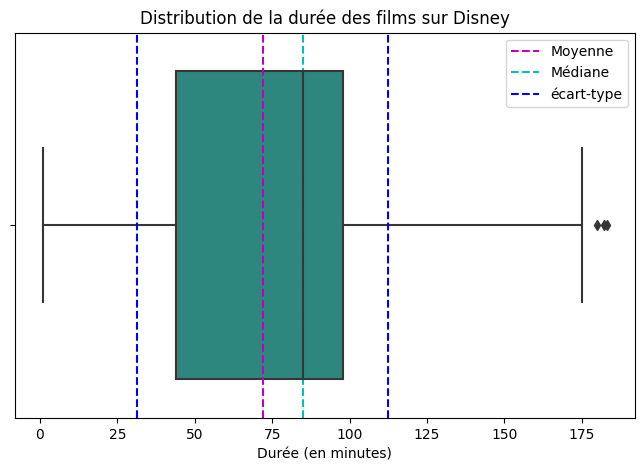

In [ ]:
duree_df = df[df["duration"].str.contains("min")].copy()
duree_df["duration"] = duree_df["duration"].str.replace("min", "").astype(float)
stat_duree = duree_df["duration"].describe()

plt.figure(figsize=(8, 5))
sns.boxplot(x="duration", data=duree_df, color="#1F968BFF")
plt.axvline(x=stat_duree["mean"], color="m", linestyle="--", label="Moyenne")
plt.axvline(x=stat_duree["50%"], color="c", linestyle="--", label="Médiane")
plt.axvline(x=stat_duree["mean"] - stat_duree["std"], color="b", linestyle="--", label="écart-type")
plt.axvline(x=stat_duree["mean"] + stat_duree["std"], color="b", linestyle="--")
plt.legend()
plt.title("Distribution de la durée des films sur Disney")
plt.xlabel("Durée (en minutes)")

plt.show()

**Distribution de la durée des films sur Disney :**

Pour les 3 premières lignes, on a utilisé une méthode similaire à celle du diagramme à barre des cinq meilleures séries télévisées avec le plus grand nombre de saison, pour sélectier uniquement les lignes où la colonne duration contient le texte "min", puis supprimer le mot "min" de chaque valeur dans la colonne.

- *describe* : calcul des statistiques de base (moyenne, écart type, médiane).
- *boxplot* : création d'une boîte.
- *axvline* : représentation de la moyenne, la médiane et l'écart-type des durées des films. La moyenne est représentée en pointillés magenta (m), la médiane est représentée en pointillés cyan (c), et l'écart-type est représenté en pointillés bleus (b). Les valeurs de ces lignes verticales sont obtenues à partir des statistiques de base calculées précédemment.